# Experimental Data (Testing)

In [51]:
base='Geo_5ulh_pre/'
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
files=os.listdir(base)

full_files=[]
sorted_frames = sorted(files, key=lambda x: int(x[3:-4]))
for i in range(len(sorted_frames)):
    file = base+sorted_frames[i]
    full_files.append(file)

In [52]:
#torch.cuda.empty_cache()
import gc
gc.collect()

230

# Load Test Images

In [53]:
full_files[0]

'Geo_5ulh_pre/tst0.tif'

In [54]:
import cv2
import numpy as np
import cv2
from joblib import Parallel, delayed
l=448
from PIL import Image
# def process_file(file_path):
#     image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
#     resized_image = cv2.resize(image, [l, l])
#     return resized_image
def process_file(file_path):
    image = np.array(Image.open(file_path))
    resized_image = cv2.resize(image, [l, l])
    resized_image = (resized_image-np.min(resized_image))/(np.max(resized_image)-np.min(resized_image))
    return resized_image

def parallel_image_processing(full_files):
    num_files = len(full_files)
    images = np.zeros([num_files, l, l])

    results = Parallel(n_jobs=16)(delayed(process_file)(file_path) for file_path in full_files)

    for i, resized_image in enumerate(results):
        images[i] = resized_image

    return images

images = parallel_image_processing(full_files)

In [55]:
import gc
torch.cuda.empty_cache()
gc.collect()
images.shape

(3200, 448, 448)

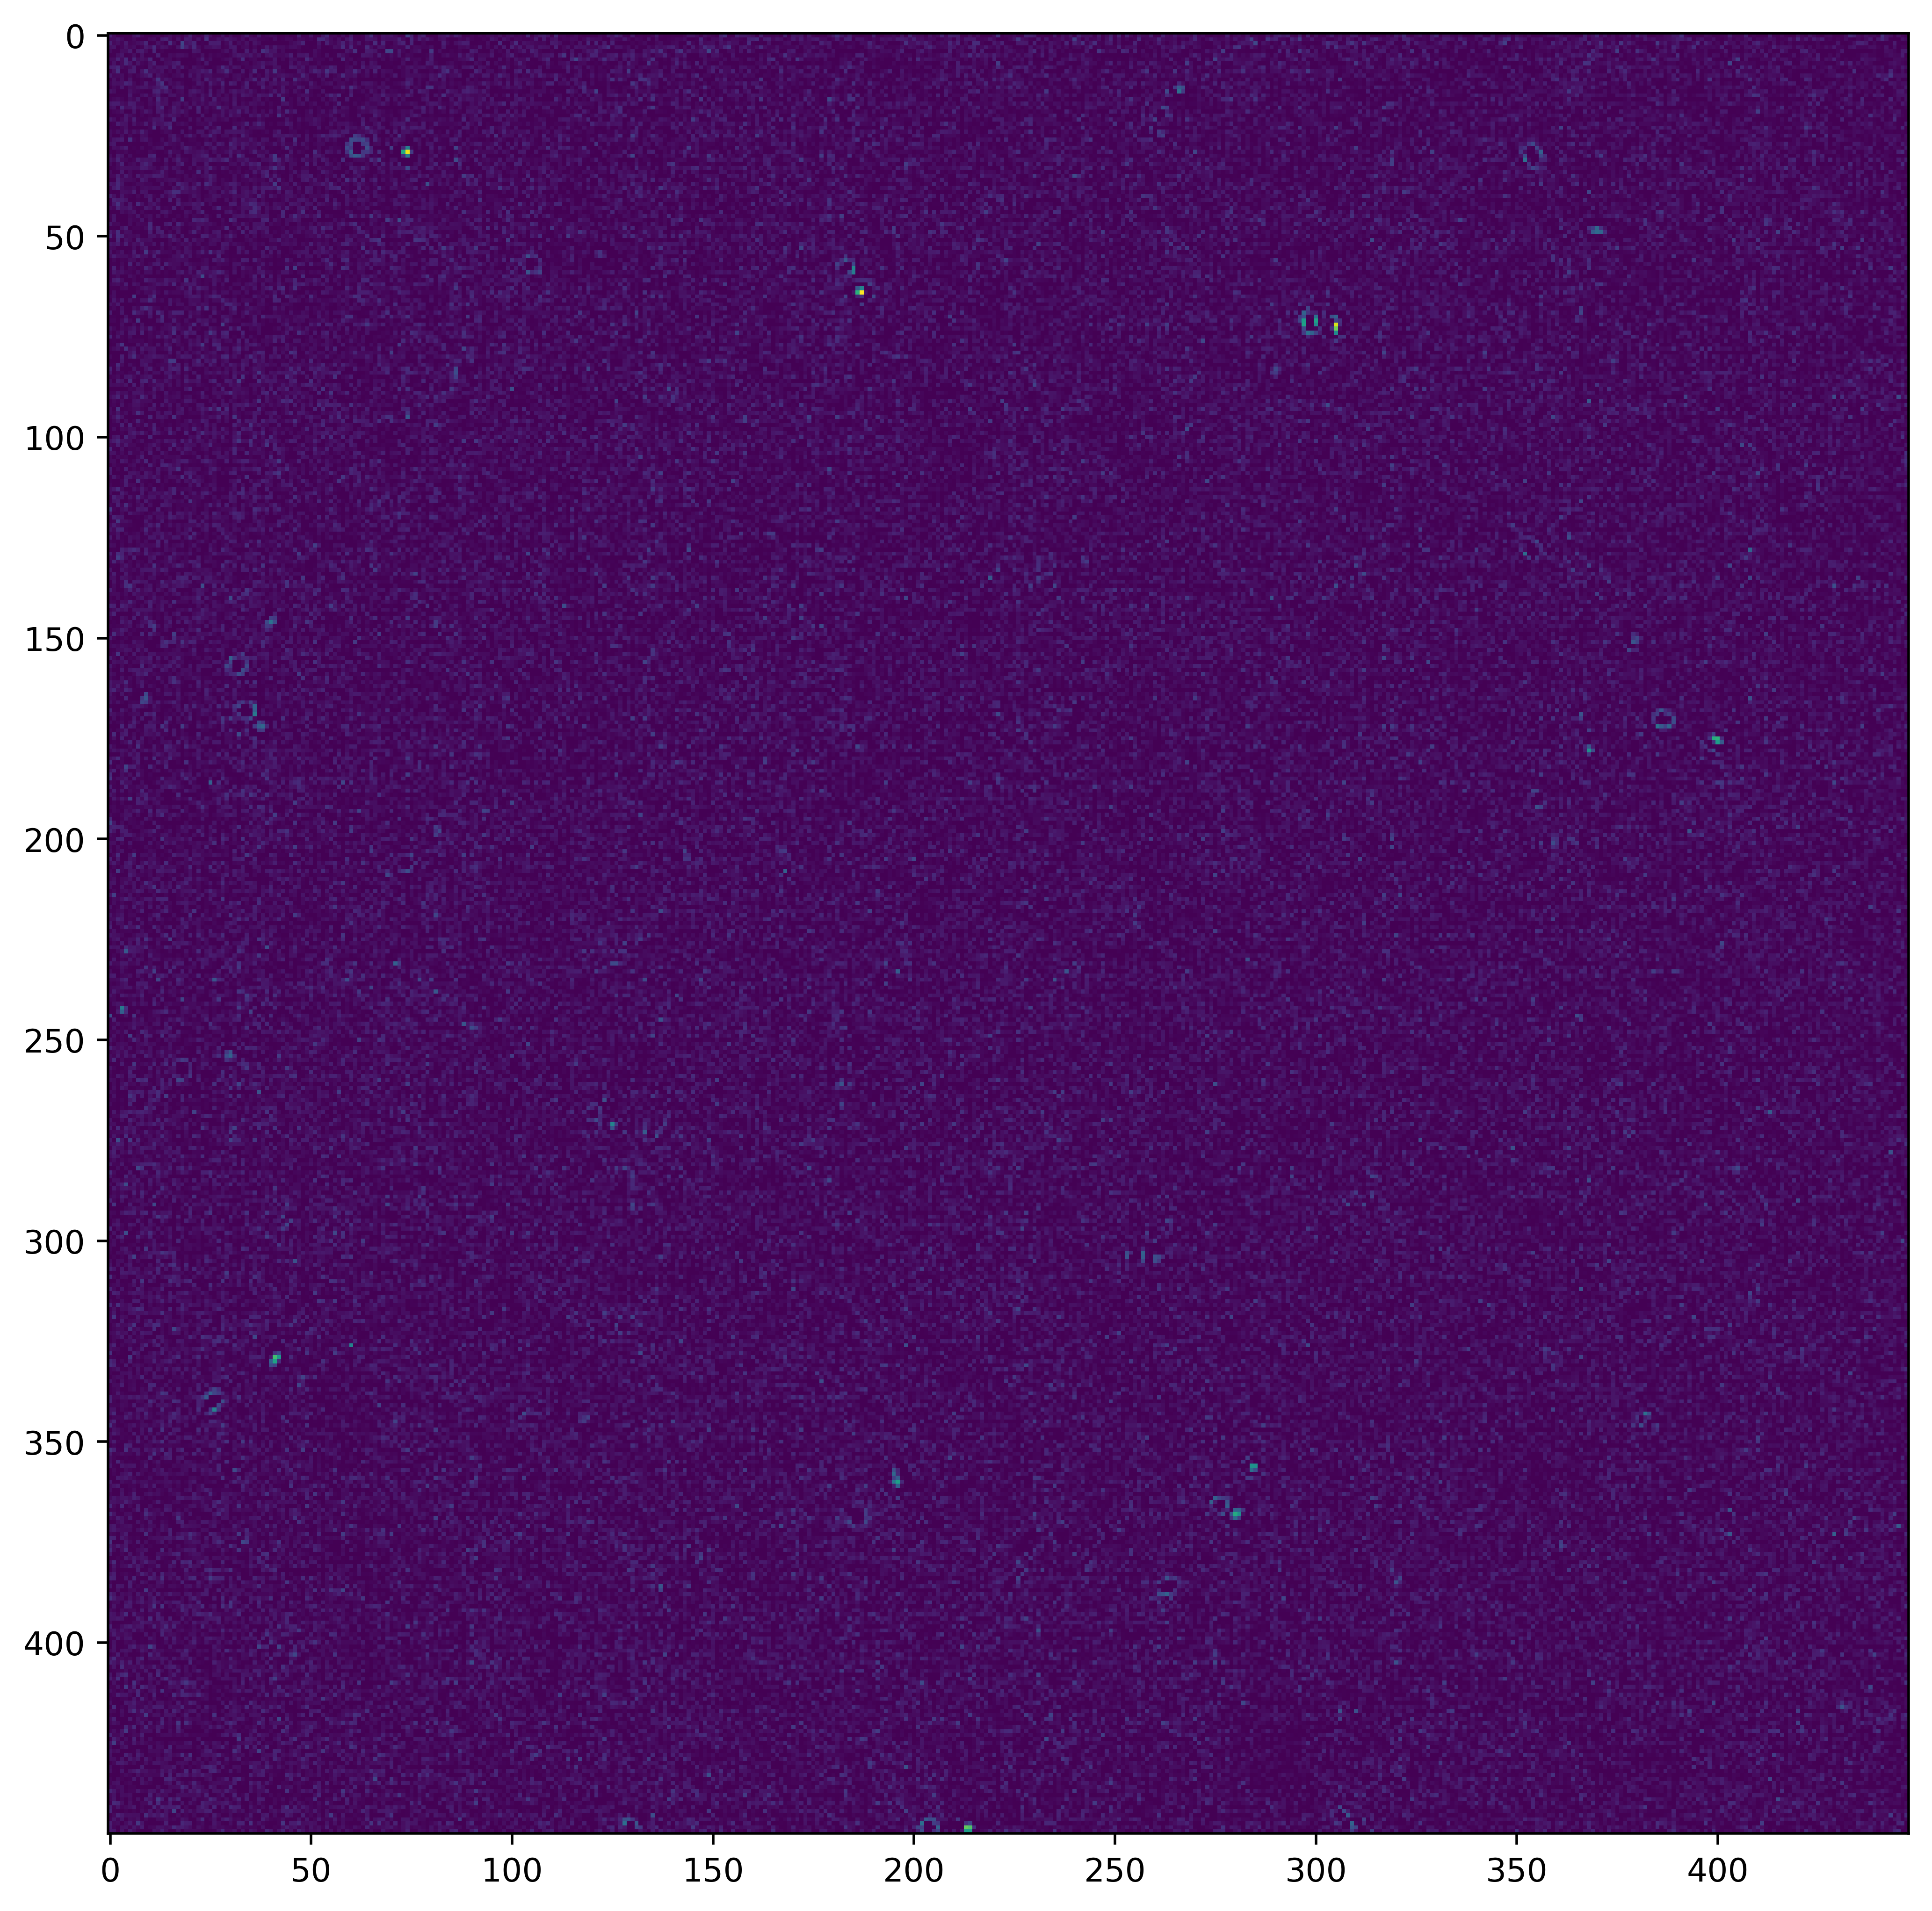

In [56]:
plt.figure(figsize=(10,10),dpi=500)
plt.imshow(images[-1])


In [380]:
# for i in range(len(images)):
#     images[i] = 1-images[i]
    

In [30]:
np.mean(images)

0.01589618882026157

In [31]:
torch.mean(images_train[0])

tensor(0.0064)

In [9]:
from torch import nn
import torch.nn.functional as F

class Patch_model2(nn.Module):
    def __init__(self):
        super(Patch_model2, self).__init__()
        self.m0 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=0.0,num_classes=2000,pretrained=True)
        self.m1 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m2 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m3 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m4 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)

        self.fc1=nn.Linear(2000, 1000)
        self.fc2=nn.Linear(1000,500)


    def forward(self, x):
        l2=224
        x1 = x[:,:,0:l2,0:l2]
        x2 = x[:,:,0:l2,l2:]
        x3 = x[:,:,l2:,0:l2]
        x4 = x[:,:,l2:,l2:]
        #torch.cuda.empty_cache()
        #gc.collect()
        x = F.gelu(self.m0(x))
        x1 = F.gelu(self.m1(x1))
        x2 = F.gelu(self.m2(x2))
        x3 = F.gelu(self.m3(x3))
        x4 = F.gelu(self.m4(x4))
        x0 = torch.cat([x1,x2,x3,x4],dim=1)
        del x1,x2, x3, x4
        x = x*x0
        x = F.gelu(self.fc1(x))
        x = self.fc2(x)
        return x#,x2,x3,x4

class Patch_model3(nn.Module):
    def __init__(self):
        super(Patch_model3, self).__init__()
        self.m1 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m2 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m3 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m4 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)

        self.fc1=nn.Linear(2000, 1000)
        self.fc2=nn.Linear(1000,500)


    def forward(self, x):
        l2=224
        x1 = x[:,:,0:l2,0:l2]
        x2 = x[:,:,0:l2,l2:]
        x3 = x[:,:,l2:,0:l2]
        x4 = x[:,:,l2:,l2:]
        #torch.cuda.empty_cache()
        #gc.collect()
        x1 = F.gelu(self.m1(x1))
        x2 = F.gelu(self.m2(x2))
        x3 = F.gelu(self.m3(x3))
        x4 = F.gelu(self.m4(x4))
        x = torch.cat([x1,x2,x3,x4],dim=1)
        del x1,x2, x3, x4
        x = F.gelu(self.fc1(x))
        x = self.fc2(x)
        return x#,x2,x3,x4

class Patch_model4(nn.Module):
    def __init__(self):
        super(Patch_model4, self).__init__()
        self.m1 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m2 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m3 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m4 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)

        self.fc0=nn.Linear(2000, 500)
        #self.fc2=nn.Linear(1000,500)


    def forward(self, x):
        l2=224
        x1 = x[:,:,0:l2,0:l2]
        x2 = x[:,:,0:l2,l2:]
        x3 = x[:,:,l2:,0:l2]
        x4 = x[:,:,l2:,l2:]
        #torch.cuda.empty_cache()
        #gc.collect()
        x1 = F.gelu(self.m1(x1))
        x2 = F.gelu(self.m2(x2))
        x3 = F.gelu(self.m3(x3))
        x4 = F.gelu(self.m4(x4))
        x = torch.cat([x1,x2,x3,x4],dim=1)
        del x1,x2, x3, x4
        #x = F.gelu(self.fc1(x))
        x = self.fc0(x)
        return x#,x2,x3,x4


class Patch_model(nn.Module):
    def __init__(self):
        super(Patch_model, self).__init__()
        self.m0 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=0.0,num_classes=2000,pretrained=True)
        self.m1 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m2 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m3 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)
        self.m4 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.0,num_classes=500,pretrained=True)

        self.fc1=nn.Linear(4000, 1000)
        self.fc2=nn.Linear(1000,500)


    def forward(self, x):
        l2=224
        x1 = x[:,:,0:l2,0:l2]
        x2 = x[:,:,0:l2,l2:]
        x3 = x[:,:,l2:,0:l2]
        x4 = x[:,:,l2:,l2:]
        #torch.cuda.empty_cache()
        #gc.collect()
        x = F.gelu(self.m0(x))
        x1 = F.gelu(self.m1(x1))
        x2 = F.gelu(self.m2(x2))
        x3 = F.gelu(self.m3(x3))
        x4 = F.gelu(self.m4(x4))
        x0 = torch.cat([x1,x2,x3,x4],dim=1)
        del x1,x2, x3, x4
        x = torch.cat([x,x0],dim=1)#x*x0
        x = F.gelu(self.fc1(x))
        x = self.fc2(x)
        return x#,x2,x3,x4

class Net0(nn.Module):
    def __init__(self):
        super(Net0, self).__init__()
        self.m1 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=0,num_classes=500,pretrained=True)

    def forward(self, x):
        x = self.m1(x)
        return x#,x2,x3,x4

class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.m1 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=0,num_classes=1000,pretrained=True)

    def forward(self, x):
        x = self.m1(x)
        return x#,x2,x3,x4

class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        self.m1 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=0,num_classes=500,pretrained=True)

    def forward(self, x):
        x = self.m1(x)


        return x#,x2,x3,x4
    

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gc
from torch.optim.lr_scheduler import StepLR
import torchvision as tv
import timm
device='cuda'
# m1 = timm.create_model('regnety_016', in_chans=40, drop_path_rate=.0,num_classes=4000,pretrained=True)
# model=Net2()
# model.to(device)
# Define your custom dataset

class TestDataset2(Dataset):
    def __init__(self, images):
        self.images = images

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image = self.images[index]

        return image.float()

In [48]:
class Net4(nn.Module):
    def __init__(self):
        super(Net4, self).__init__()
        self.m1 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=0.2,num_classes=500,pretrained=True) 
        self.m2 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=0.2,num_classes=500,pretrained=True) 

        self.fc1=nn.Linear(2,2)
        # self.fc2 = nn.Linear(2000,1000)

    def forward(self, x):
        vx = F.gelu(self.m1(x))
        vy = F.gelu(self.m2(x))
        vx = vx.unsqueeze(2)
        vy = vy.unsqueeze(2)
        x = torch.cat([vx,vy],dim=2)
        
        # x = F.gelu(self.fc1(x))
        x = self.fc1(x)
       # x = self.fc3(x)


        return x#,x2,x3,x4


In [49]:


model1 = timm.create_model('volo_d2_384', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model1.load_state_dict(torch.load('models/vx_model_volod1_384px_noscale_disp_500_4_27'))
model1.to(device).eval()

model2 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model2.load_state_dict(torch.load('models/vx_model_volod1_384px_opposite_disp_300_4_27'))
model2.to(device).eval()

model3 = timm.create_model('regnetx_032', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model3.load_state_dict(torch.load('models/vx_model_regnetx32_384px_disp_all_4_27'))
model3.to(device).eval()

model4 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model4.load_state_dict(torch.load('models/vx_model_volod1_384px_disp_all_4_27'))
model4.to(device).eval()

model5 = timm.create_model('volo_d3_448', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model5.load_state_dict(torch.load('models/vx_model_volod3_448px_disp_all_4_27'))
model5.to(device).eval()

model6 = timm.create_model('regnetx_016', in_chans=40, drop_path_rate=.0,num_classes=500,pretrained=False)
model6.load_state_dict(torch.load('models/vx_model_regnetx_384px_disp_all_4_27'))
model6.to(device).eval()

model7 = Net4()
model7.load_state_dict(torch.load('models/vel_model_volod1_384px_disp_all_4_27'))
model7.to(device).eval()

#vel_model_volod1_384px_disp_all_4_27


Net4(
  (m1): VOLO(
    (patch_embed): PatchEmbed(
      (conv): Sequential(
        (0): Conv2d(40, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
        (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (8): ReLU(inplace=True)
      )
      (proj): Conv2d(64, 192, kernel_size=(4, 4), stride=(4, 4))
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (network): ModuleList(
      (0): Sequential(
        (0): Outlooker(
          (norm1): LayerNorm((192,), eps=1e-05, elementwise_affine=True)
   

In [51]:

import torch.nn.functional as F

In [57]:
#Paen
#images = images[22:,:,:].reshape([(images.shape[0]-22)//40,40,500,500])
#Geo
#images = images[:-39,:,:].reshape([(images.shape[0]-39)//40,40,500,500])
images = images.reshape([(images.shape[0])//40,40,448,448])
images.shape

(80, 40, 448, 448)

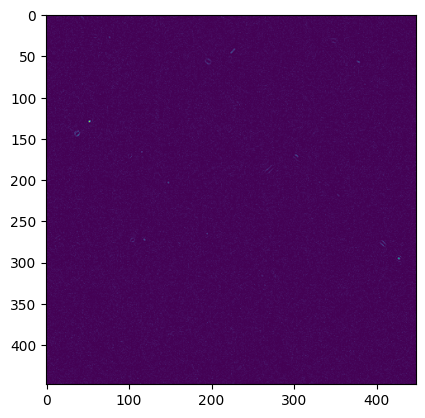

In [58]:
images = torch.tensor(images)
dataset_test = TestDataset2(images)#  xtorch_test, distr_torch_test, scales_test2)
batch_size = 10
test_dataloader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False, drop_last=True, num_workers=0)
x = next(iter(test_dataloader))
plt.imshow(x[0,39,:,:])

In [423]:
import torchvision
outputs=[]
outputs2=[]
torch.cuda.empty_cache()
gc.collect()
model.eval()
model1.eval()
model2.eval()
model3.eval()
model4.eval()
model5.eval()
model6.eval()

# print (slope200, slope300, slope500, slope_all)
# print (int200, int300, int500, int_all)
# tensor(182.7808) tensor(182.7808) tensor(184.0055) tensor(216.6908)
# tensor(-16.0141) tensor(-16.0141) tensor(-17.2388) tensor(-49.9241)
slope200, int200 = 182.7808, -16.0141
slope_all, int_all = 216.6908, -49.9241
slope_all2, int_all2 = 230, -45
#vx_model_volod4_448px_disp_all_max151_1078_min-49_9241
max1 = 151.1078
min1 = -49.9241
slope1 = max1-min1
int1 = min1

with torch.no_grad():
    for x in test_dataloader:
        out0 = np.sort(model((x).to(device)).detach().cpu().numpy())*slope1+int1
       # x=1-x
        x2 = torchvision.transforms.functional.resize(x, 384)
        
        out1 = np.sort(model1((x2).to(device)).detach().cpu().numpy())
        out2 = np.sort(model2((1-x2).to(device)).detach().cpu().numpy())*slope200+int200
        out4 = np.sort(model4((x2).to(device)).detach().cpu().numpy())*slope_all+int_all
        out5 = np.sort(model5((x).to(device)).detach().cpu().numpy())*slope_all2+int_all2
        out6 = np.sort(model6((x).to(device)).detach().cpu().numpy())
        out7= np.sort(model7((x2).to(device)).detach().cpu().numpy())*slope_all2+int_all2
        out8 = out7[:,:,0]*1.5-10
        out9 = out7[:,:,0]*1.3-16
        out7 = out7[:,:,1]

        
        ##class1
        #out=(out0*10+out1+out4*4+out5+out2*3+out7+out8*2)/22

        ##class3
        #out=(out0*18+out1*4+out4*1+out2*2+out8*6)/31

        ##class4
        out=(out0*10+out1*14+out9*2)/27

        outputs.append(out)
        #outputs2.append(out2)

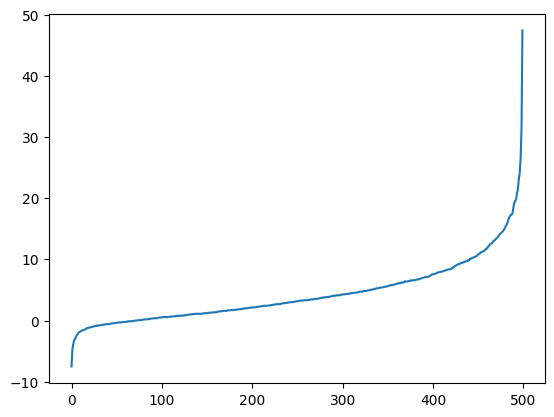

In [424]:
plt.plot(out[0])


In [348]:
#out0 = np.reshape(out0, [out0.shape[0]*out0.shape[1],])

 #       out0[out0<0] = out0[out0<0] - np.min(out0)

  #      out0 = interpolate_vectors(out0, batch_size*500)


(13, 500)

In [ ]:
64.4513

In [59]:
torch.cuda.empty_cache()
gc.collect()

model.eval()

import torchvision
outputs=[]
#tensor(64.4513) tensor(-66.1406)
intercept2= -66.1406
scale_factor2= 64.4513+66.1406
with torch.no_grad():
    for x in test_dataloader:
        #x2 = torchvision.transforms.functional.resize(x, 384)

        out=np.sort(model((x).to(device)).detach().cpu().numpy())*scale_factor2+intercept2

        outputs.append(out)


In [38]:
outputs[0]

array([[-16.1782   , -11.398415 , -10.055641 , ...,  13.487984 ,
         13.502197 ,  17.911606 ],
       [-20.917912 , -15.591625 , -13.848827 , ...,  17.463715 ,
         18.552689 ,  24.522827 ],
       [-18.339077 , -13.33112  , -11.329159 , ...,  15.483673 ,
         16.241203 ,  22.44056  ],
       ...,
       [-18.587067 , -14.976166 , -12.166199 , ...,  15.031677 ,
         15.077629 ,  18.512749 ],
       [-14.20586  , -11.522434 ,  -8.972954 , ...,  12.487221 ,
         12.579315 ,  16.021439 ],
       [ -9.135078 ,  -7.704361 ,  -6.408615 , ...,   6.653816 ,
          8.1731415,   9.133942 ]], dtype=float32)

In [61]:
outputs = np.reshape(np.hstack(outputs),[40000  ,])

In [408]:
outputs

array([-5.7326903, -3.5702708, -3.0261703, ..., 24.006485 , 26.814636 ,
       36.631153 ], dtype=float32)

### Geobacter 1 = "out"

In [41]:
def interpolate_vectors(vector, target_length):
    current_length = len(vector)
    # Create a new x-axis with the desired length
    new_x = np.linspace(0, current_length - 1, target_length)
    # Create the old x-axis based on the current length
    old_x = np.arange(current_length)
    # Perform linear interpolation
    interpolated_vector = np.interp(new_x, old_x, vector)
    return interpolated_vector



def calculate_velocity( y_positions):
    # Calculate velocities
    y_velocities = (y_positions[1:] - y_positions[:-1]) 
    
    # Initialize an array to store the velocity autocorrelation values
    
    return  y_velocities

In [62]:
directory='../tmate_trajectories/'
filename = os.listdir(directory)[4]
print(filename)
df = pd.read_csv(os.path.join(directory,filename),header=0, skiprows=[1,2,3])
#df.Positio
tracks = df.TRACK_ID.unique()
vels=1
for i in range(len(tracks)):
    idx = tracks[i]
    if df[df.TRACK_ID==idx].sort_values(by='FRAME').FRAME.iloc[-1] < (images.shape[0]*images.shape[1]):
        posy = df[df.TRACK_ID==idx].sort_values(by='FRAME').POSITION_Y
        yvel = calculate_velocity(np.array(posy))
        
        #posx[posx==0]=np.nan
        #posy[posy==0]=np.nan
        #vel = (np.sqrt(posx.diff()**2+posy.diff()**2)/.12).dropna()
    
        vels = np.hstack([vels, yvel])

geo_5ulh_001.csv


In [63]:
vels

array([ 1.        ,  1.78439401,  1.07938484, ..., -1.64515258,
       -2.60524376, -3.82989578])

In [64]:
vels=vels[~np.isnan(vels)]
#vels[vels==0]=0.1
# X Scale factor:  201.03192
# X Intercept:  -49.924103
# scale_factor = 201.03192
# intercept = -49.924103

In [65]:
print(np.mean(outputs))
print(np.mean(vels))

0.9403371
-0.6331428397212375


In [341]:
np.mean(out2)

6.916281

In [224]:
out

array([1.4348564, 1.6409187, 2.322609 , ..., 8.706032 , 8.855389 ,
       8.929611 ], dtype=float32)

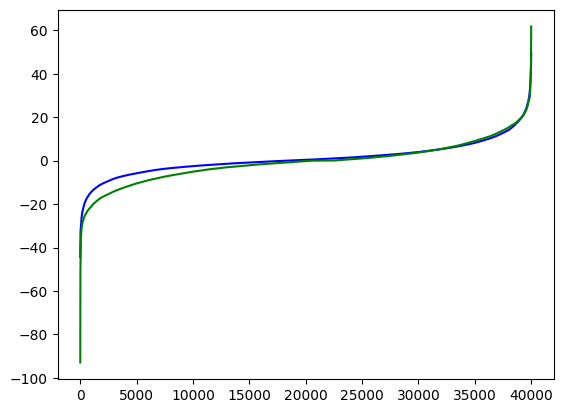

In [66]:
vels2 = interpolate_vectors(np.sort(vels), len(outputs))
#xscale = 201
#intercept = -49.9
plt.plot(np.sort(outputs), c='b')
plt.plot(np.sort(vels2), c='g')

In [251]:
out0

array([[-0.02498762,  0.0378291 ,  0.06044016, ...,  5.2131214 ,
         5.2226667 ,  6.8682303 ],
       [-0.02277473,  0.03653021,  0.06025662, ...,  5.171699  ,
         5.183982  ,  6.8211527 ],
       [-0.02291883,  0.03489473,  0.05901675, ...,  5.2576847 ,
         5.25974   ,  6.9253097 ],
       ...,
       [-0.02520523,  0.0371021 ,  0.05528578, ...,  5.0298886 ,
         5.053476  ,  6.6672807 ],
       [-0.0257259 ,  0.03689412,  0.05398463, ...,  5.01144   ,
         5.0357084 ,  6.6487713 ],
       [-0.02559044,  0.03692893,  0.0536023 , ...,  5.000195  ,
         5.0252047 ,  6.635705  ]], dtype=float32)

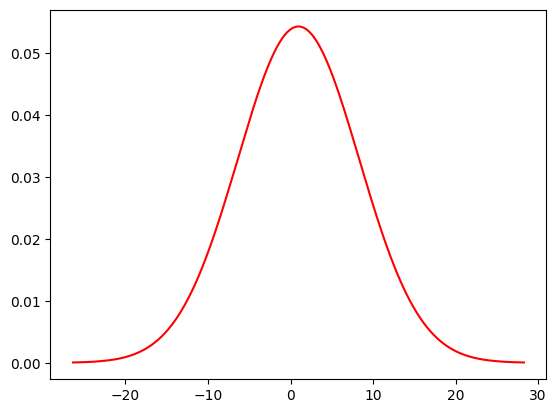

In [67]:
from scipy.stats import exponweib,lognorm, beta, betaprime, norm
#new_out=(out6*4+out2*1+out9*.5+out11*1+out10*2.5)/9
a,b= norm.fit(np.sort(out))
g5xtorch= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 4000)
g5distr_torch=norm.pdf(g5xtorch, a,b)
plt.plot(g5xtorch,g5distr_torch,c='r')
#plt.xscale('log')
#plt.yscale('log')
#plt.xlim([3e-1,3e2])
#plt.ylim([4e-5,.1])
#15, 16, 20, 9, 3, 10
#3, 4, 6, 7, 12, 13, 17, 18, 19, 20

In [ ]:
from scipy.stats import exponweib,lognorm, beta, betaprime, norm

a,b= norm.fit(np.sort(vels))
g5xvel= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 1000)
g5distr_vel=norm.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Paenibacillus 5 ul/h Vx Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

In [ ]:
from scipy.stats import exponweib,lognorm, beta, betaprime, norm

a,b= norm.fit(np.sort(vels))
g5xvel= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 1000)
g5distr_vel=norm.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Paenibacillus 1 ul/h Vx Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

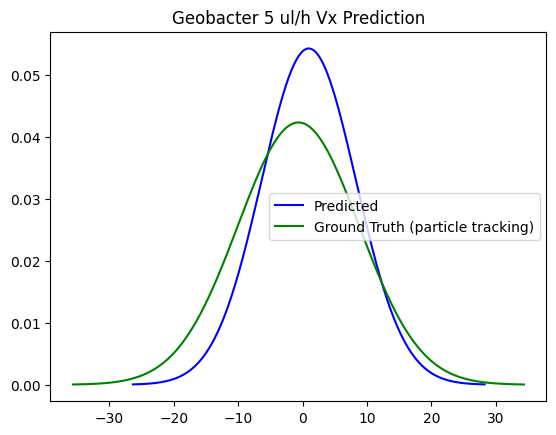

In [68]:
from scipy.stats import exponweib,lognorm, beta, betaprime, norm

a,b= norm.fit(np.sort(vels))
g5xvel= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 1000)
g5distr_vel=norm.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Geobacter 5 ul/h Vx Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

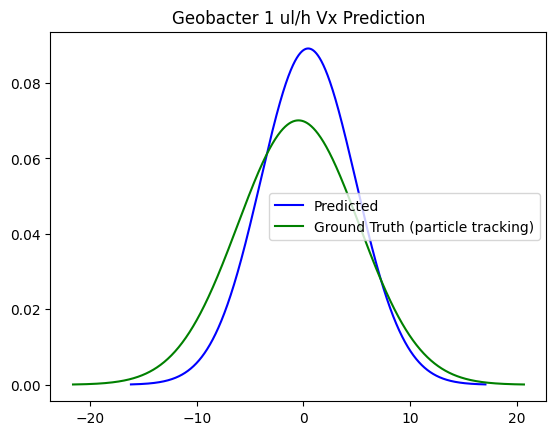

In [50]:
from scipy.stats import exponweib,lognorm, beta, betaprime, norm

a,b= norm.fit(np.sort(vels))
g5xvel= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 1000)
g5distr_vel=norm.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Geobacter 1 ul/h Vx Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

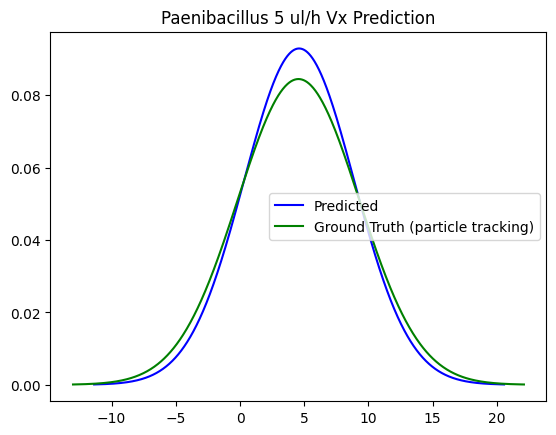

In [414]:
from scipy.stats import exponweib,lognorm, beta, betaprime, norm

a,b= norm.fit(np.sort(vels))
g5xvel= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 1000)
g5distr_vel=norm.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Paenibacillus 5 ul/h Vx Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

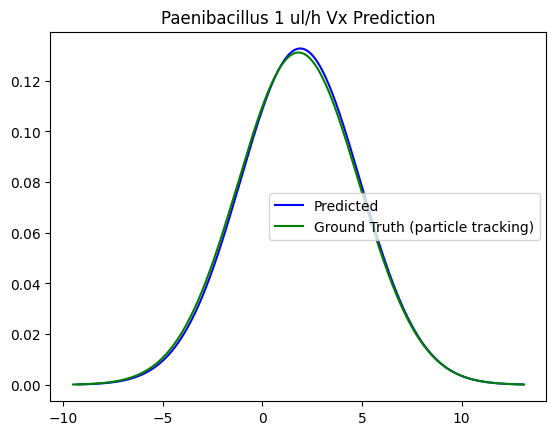

In [373]:
from scipy.stats import exponweib,lognorm, beta, betaprime, norm

a,b= norm.fit(np.sort(vels))
g5xvel= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 1000)
g5distr_vel=norm.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Paenibacillus 1 ul/h Vx Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

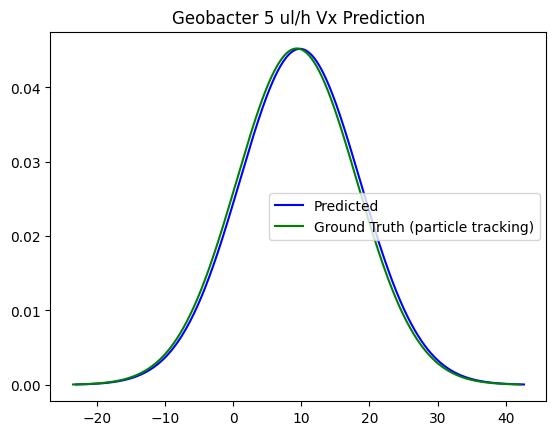

In [110]:
from scipy.stats import exponweib,lognorm, beta, betaprime, norm

a,b= norm.fit(np.sort(vels))
g5xvel= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 1000)
g5distr_vel=norm.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Geobacter 5 ul/h Vx Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

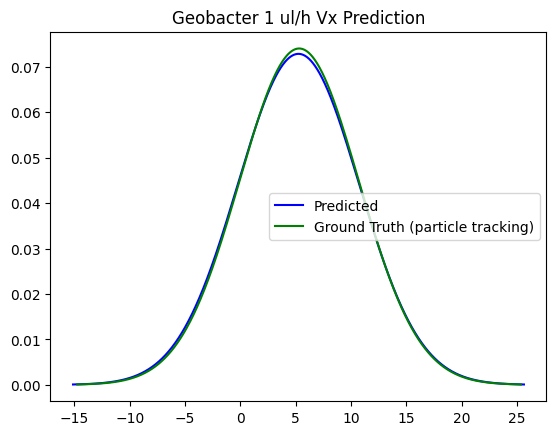

In [244]:
from scipy.stats import exponweib,lognorm, beta, betaprime, norm

a,b= norm.fit(np.sort(vels))
g5xvel= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 1000)
g5distr_vel=norm.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Geobacter 1 ul/h Vx Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

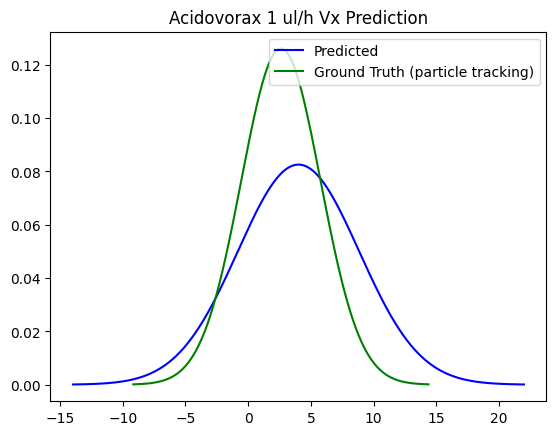

In [430]:
from scipy.stats import exponweib,lognorm, beta, betaprime, norm

a,b= norm.fit(np.sort(vels))
g5xvel= np.linspace(norm.ppf(0.0001, a,b),
                norm.ppf(0.9999, a,b), 1000)
g5distr_vel=norm.pdf(g5xvel, a,b)
plt.plot(g5xtorch,g5distr_torch,c='b')
plt.plot(g5xvel,g5distr_vel,c='g')

plt.title('Acidovorax 1 ul/h Vx Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

(0.015, 0.06)

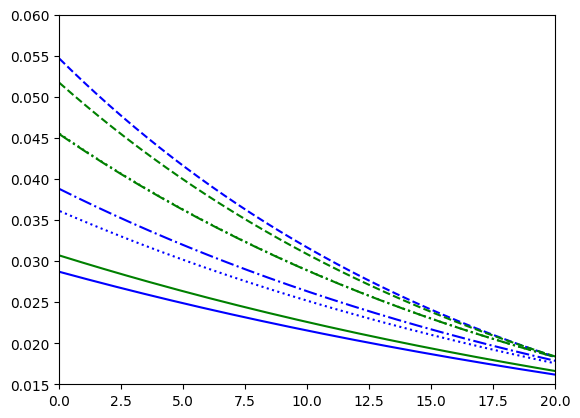

In [242]:
plt.plot(g1xtorch,g1distr_torch,c='b', ls='-.')
plt.plot(g1xvel,g1distr_vel,c='g', ls='-.')
plt.plot(g5xtorch,g5distr_torch,c='b', ls='--')
plt.plot(g5xvel,g5distr_vel,c='g', ls='--')
plt.plot(p1xtorch,p1distr_torch,c='b')
plt.plot(p1xvel,p1distr_vel,c='g')
plt.plot(p5xtorch,p5distr_torch,c='b', ls=':')
plt.plot(p5xvel,p5distr_vel,c='g', ls=':')
plt.xlim([0,20])
plt.ylim([.015,.06])
#plt.yscale('log')

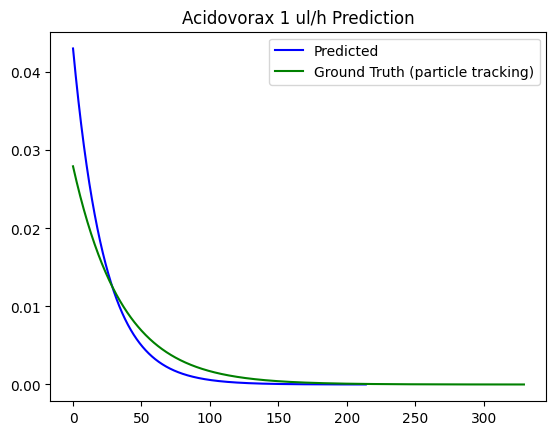

In [267]:
from scipy.stats import exponweib,lognorm, beta, betaprime, norm

a,b= expon.fit(np.sort(vels))
a1xvel= np.linspace(expon.ppf(0.0001, a,b),
                expon.ppf(0.9999, a,b), 1000)
a1distr_vel=expon.pdf(a1xvel, a,b)
plt.plot(a1xtorch,a1distr_torch,c='b')
plt.plot(a1xvel,a1distr_vel,c='g')

plt.title('Acidovorax 1 ul/h Prediction')
plt.legend(['Predicted', 'Ground Truth (particle tracking)'])

# Model Training

In [1]:
import os

sim_dir = os.listdir('all_sims')
file_dir = os.listdir('all_traj_files')
# Custom sorting key function
def sort_key(item):
    if '_brown' in item:
        return (1, int(item[3:-6]))
    elif 'straight' in item:
        return (2, int(item[3:-9]))
    elif 'blank' in item:
        return (3, int(item[3:-6]))
    else:
        return (0, int(item[3:]))

# Sort the list using the custom key
sorted_sim_dir = sorted(sim_dir, key=sort_key)
sorted_sim_dir=sorted_sim_dir
print(sorted_sim_dir)

['sim61', 'sim62', 'sim63', 'sim64', 'sim65', 'sim66', 'sim67', 'sim68', 'sim69', 'sim70', 'sim71', 'sim72', 'sim73', 'sim74', 'sim75', 'sim76', 'sim77', 'sim78', 'sim79', 'sim80', 'sim81', 'sim82', 'sim83', 'sim84', 'sim85', 'sim86', 'sim87', 'sim88', 'sim89', 'sim90', 'sim91', 'sim92', 'sim93', 'sim94', 'sim95', 'sim96', 'sim97', 'sim98', 'sim99', 'sim100', 'sim101', 'sim102', 'sim103', 'sim104', 'sim105', 'sim106', 'sim107', 'sim108', 'sim109', 'sim110', 'sim111', 'sim112', 'sim113', 'sim114', 'sim115', 'sim116', 'sim117', 'sim118', 'sim119', 'sim120', 'sim121', 'sim122', 'sim123', 'sim124', 'sim125', 'sim126', 'sim127', 'sim128', 'sim129', 'sim130', 'sim131', 'sim132', 'sim133', 'sim134', 'sim135', 'sim136', 'sim137', 'sim138', 'sim139', 'sim140', 'sim141', 'sim142', 'sim143', 'sim144', 'sim145', 'sim146', 'sim147', 'sim148', 'sim149', 'sim150', 'sim151', 'sim152', 'sim153', 'sim154', 'sim155', 'sim156', 'sim157', 'sim158', 'sim159', 'sim161', 'sim162', 'sim163', 'sim164', 'sim165'

In [2]:
import os


# Custom sorting key function
def sort_key2(item):
    if '_brown' in item:
        return (1, int(item[6:-10]))
    elif 'straight' in item:
        return (2, int(item[6:-13]))
    elif 'blank' in item:
        return (3, int(item[6:-10])) # Extract the numeric part for files with '_brown'
    else:
        return (0, int(item[6:-4]))  # Extract the numeric part for files without '_brown'

# Sort the list using the custom key
sorted_file_dir = sorted(file_dir, key=sort_key2)

# Split the sorted list into 'yc_' and 'xc_' files
yc_files = [f for f in sorted_file_dir if f.startswith('yc_')]
xc_files = [f for f in sorted_file_dir if f.startswith('xc_')]

# Create a list of lists with corresponding 'yc_' and 'xc_' files
sorted_file_pairs = [[yc, xc] for yc, xc in zip(yc_files, xc_files)]

sorted_file_pairs=sorted_file_pairs
print(sorted_file_pairs)

[['yc_sim61.csv', 'xc_sim61.csv'], ['yc_sim62.csv', 'xc_sim62.csv'], ['yc_sim63.csv', 'xc_sim63.csv'], ['yc_sim64.csv', 'xc_sim64.csv'], ['yc_sim65.csv', 'xc_sim65.csv'], ['yc_sim66.csv', 'xc_sim66.csv'], ['yc_sim67.csv', 'xc_sim67.csv'], ['yc_sim68.csv', 'xc_sim68.csv'], ['yc_sim69.csv', 'xc_sim69.csv'], ['yc_sim70.csv', 'xc_sim70.csv'], ['yc_sim71.csv', 'xc_sim71.csv'], ['yc_sim72.csv', 'xc_sim72.csv'], ['yc_sim73.csv', 'xc_sim73.csv'], ['yc_sim74.csv', 'xc_sim74.csv'], ['yc_sim75.csv', 'xc_sim75.csv'], ['yc_sim76.csv', 'xc_sim76.csv'], ['yc_sim77.csv', 'xc_sim77.csv'], ['yc_sim78.csv', 'xc_sim78.csv'], ['yc_sim79.csv', 'xc_sim79.csv'], ['yc_sim80.csv', 'xc_sim80.csv'], ['yc_sim81.csv', 'xc_sim81.csv'], ['yc_sim82.csv', 'xc_sim82.csv'], ['yc_sim83.csv', 'xc_sim83.csv'], ['yc_sim84.csv', 'xc_sim84.csv'], ['yc_sim85.csv', 'xc_sim85.csv'], ['yc_sim86.csv', 'xc_sim86.csv'], ['yc_sim87.csv', 'xc_sim87.csv'], ['yc_sim88.csv', 'xc_sim88.csv'], ['yc_sim89.csv', 'xc_sim89.csv'], ['yc_sim90.cs

In [3]:
# from sklearn.model_selection import train_test_split

# # Create a range of numbers from 0 to 534
# indices = range(535)

# # Perform the train-test split
# train_indices, test_indices = train_test_split(indices, test_size=0.2)

In [4]:
# test_indices

In [5]:
# test_dirs = [sorted_file_pairs[i] for i in test_indices]
# train_dirs = [sorted_file_pairs[i] for i in train_indices]

# len(test_dirs)

In [29]:
train_dirs = sorted_file_pairs#[0:-100]+sorted_file_pairs[5::6]
train_dirs =sorted_file_pairs[0::5]+sorted_file_pairs[2::5]+sorted_file_pairs[1::5]+sorted_file_pairs[3::5]#+sorted_file_pairs[7::7]
len(train_dirs)
test_dirs = sorted_file_pairs[4::5]

In [7]:
# test_image_files = [sorted_sim_dir[i] for i in test_indices]
# train_image_files = [sorted_sim_dir[i] for i in train_indices]

In [28]:
train_image_files = sorted_sim_dir[0::5]+sorted_sim_dir[2::5]+sorted_sim_dir[1::5]+sorted_sim_dir[3::5]#+sorted_file_pairs[7::7]
print(len(train_dirs))
test_image_files = sorted_sim_dir[4::5]


685


In [30]:
# train_image_files = sorted_sim_dir#[0:-100]
# train_image_files = sorted_sim_dir[1::6]+sorted_sim_dir[2::6]+sorted_sim_dir[3::6]+sorted_sim_dir[4::6]+sorted_sim_dir[5::6]#+sorted_file_pairs[6::7]+sorted_file_pairs[7::7]
# len(train_dirs)
# #train_image_files = sorted_sim_dir[1::7]+sorted_sim_dir[2::7]+sorted_sim_dir[3::7]+sorted_sim_dir[4::7]+sorted_sim_dir[5::7]+sorted_sim_dir[6::7]+sorted_sim_dir[7::7]

len(train_image_files)

685

In [31]:
len(test_image_files)

171

In [32]:
len(test_dirs)

171

In [12]:
import timm

In [13]:
timm.list_models()

['bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'beitv2_base_patch16_224',
 'beitv2_large_patch16_224',
 'botnet26t_256',
 'botnet50ts_256',
 'caformer_b36',
 'caformer_m36',
 'caformer_s18',
 'caformer_s36',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_medium',
 'coat_lite_medium_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_small',
 'coat_tiny',
 'coatnet_0_224',
 'coatnet_0_rw_224',
 'coatnet_1_224',
 'coatnet_1_rw_224',
 'coatnet_2_224',
 'coatnet_2_rw_224',
 'coatnet_3_224',
 'coatnet_3_rw_224',
 'coatnet_4_224',
 'coatnet_5_224',
 'coatnet_bn_0_rw_224',
 'coatnet_nano_cc_224',
 'coatnet_nano_rw_224',
 'coatnet_pico_rw_224',
 'coatnet_rmlp_0_rw_224',
 'coatnet_rmlp_1_rw2_224',
 'coatnet_rmlp_1_r

In [10]:
swinv2_small_window16_256
vit_so150m_patch16_reg4_gap_256
maxxvitv2_nano_rw_256
levit_conv_256d

768

In [33]:
import pandas as pd
import numpy as np
import cv2
import os
import torch
import re

s=384
k=40
images_train = torch.zeros(len(train_image_files),k,s, s)
images_test = torch.zeros(len(test_image_files),k,s, s)
for i in range(len(train_image_files)):
    base = 'all_sims/'+train_image_files[i]
    im_dir = os.listdir(base)
    im_dir = sorted(im_dir, key=lambda x: int(re.findall(r'\d+', x)[0]))
    for j in range(k):
        
        img= torch.tensor(cv2.resize(cv2.imread(base+'/'+im_dir[j], cv2.IMREAD_GRAYSCALE),(s,s)))
        img = (img-torch.min(img))/(torch.max(img)-torch.min(img))
        images_train[i,j,:,:] = img


for i in range(len(test_image_files)):
    base = 'all_sims/'+test_image_files[i]
    im_dir = os.listdir(base)
    im_dir = sorted(im_dir, key=lambda x: int(re.findall(r'\d+', x)[0]))
    for j in range(k):
        
        img = torch.tensor(cv2.resize(cv2.imread(base+'/'+im_dir[j], cv2.IMREAD_GRAYSCALE),(s,s)))
        img = (img-torch.min(img))/(torch.max(img)-torch.min(img))
        images_test[i,j,:,:] = img
        
im_dir

['Fig_1.jpg',
 'Fig_2.jpg',
 'Fig_3.jpg',
 'Fig_4.jpg',
 'Fig_5.jpg',
 'Fig_6.jpg',
 'Fig_7.jpg',
 'Fig_8.jpg',
 'Fig_9.jpg',
 'Fig_10.jpg',
 'Fig_11.jpg',
 'Fig_12.jpg',
 'Fig_13.jpg',
 'Fig_14.jpg',
 'Fig_15.jpg',
 'Fig_16.jpg',
 'Fig_17.jpg',
 'Fig_18.jpg',
 'Fig_19.jpg',
 'Fig_20.jpg',
 'Fig_21.jpg',
 'Fig_22.jpg',
 'Fig_23.jpg',
 'Fig_24.jpg',
 'Fig_25.jpg',
 'Fig_26.jpg',
 'Fig_27.jpg',
 'Fig_28.jpg',
 'Fig_29.jpg',
 'Fig_30.jpg',
 'Fig_31.jpg',
 'Fig_32.jpg',
 'Fig_33.jpg',
 'Fig_34.jpg',
 'Fig_35.jpg',
 'Fig_36.jpg',
 'Fig_37.jpg',
 'Fig_38.jpg',
 'Fig_39.jpg',
 'Fig_40.jpg']

In [13]:
import matplotlib.pyplot as plt
#plt.imshow(images_train[100,30,:,:])
images_train.shape

torch.Size([685, 40, 384, 384])

In [14]:
import gc
del im_dir
gc.collect()

0

In [34]:
import pandas as pd
import numpy as np
import cv2
import os
import torch
import re
import matplotlib.pyplot as plt
from scipy.stats import exponweib,lognorm

def interpolate_vectors(vector, target_length):
    current_length = len(vector)
    # Create a new x-axis with the desired length
    new_x = np.linspace(0, current_length - 1, target_length)
    # Create the old x-axis based on the current length
    old_x = np.arange(current_length)
    # Perform linear interpolation
    interpolated_vector = np.interp(new_x, old_x, vector)
    return interpolated_vector
    

base='all_traj_files/'
target_length=500
def calculate_velocity( y_positions):
    num_frames, num_particles = y_positions.shape 
    # Calculate velocities
    y_velocities = (y_positions[1:] - y_positions[:-1]) 
    
    # Initialize an array to store the velocity autocorrelation values
    
    return  y_velocities

y_vels = torch.zeros(len(train_dirs),target_length)

for i in range(len(train_dirs)):
    y_arr= np.array(pd.read_csv(base+train_dirs[i][0], header=None))
    yvel = calculate_velocity(y_arr)
    #angle_array = np.sort(angle_array)
    yvel=np.sort(yvel[~np.isnan(yvel)])
    yvel_array = interpolate_vectors(yvel, target_length)
    y_vels[i,:] = torch.tensor(yvel_array)



In [35]:
train_dirs[i][1]
#n = n-minn/mxn-minn

'xc_sim78_straight.csv'

In [17]:
mall = torch.max(y_vels)
minall = torch.min(y_vels)
mall
#y_vels*(max200-min200)+min200

tensor(64.4513)

In [92]:
slope200 = np.array(max200-min200)
int200 = np.array(min200)

slope300 = np.array(max300-min300)
int300 = np.array(min300)

slope500 = np.array(max500-min500)
int500 = np.array(min500)

slope_all = np.array(max_all-min_all)
int_all = np.array(min_all)

print (slope200, slope300, slope500, slope_all)
print (int200, int300, int500, int_all)
# tensor(182.7808) tensor(182.7808) tensor(184.0055) tensor(216.6908)
# tensor(-16.0141) tensor(-16.0141) tensor(-17.2388) tensor(-49.9241)

182.78078 182.78078 184.00546 216.6908
-16.014082 -16.014082 -17.238775 -49.924103


In [36]:
y_vels_test = torch.zeros(len(test_dirs),target_length)

for i in range(len(test_dirs)):
    y_arr= np.array(pd.read_csv(base+test_dirs[i][0], header=None))
    yvel = calculate_velocity(y_arr)
    #angle_array = np.sort(angle_array)
    yvel=np.sort(yvel[~np.isnan(yvel)])
    yvel_array = interpolate_vectors(yvel, target_length)
    y_vels_test[i,:] = torch.tensor(yvel_array)


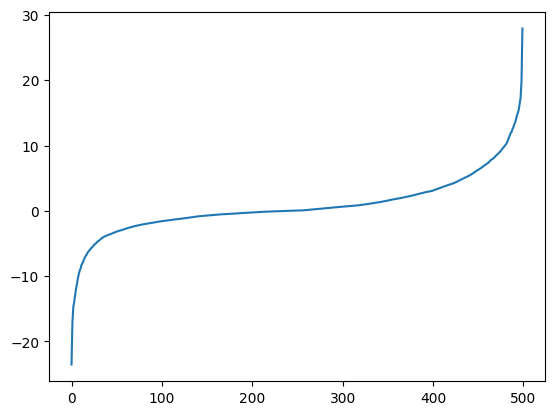

In [13]:
plt.plot(y_vels_test[10])


In [21]:
timm.list_models()

['bat_resnext26ts',
 'beit_base_patch16_224',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'beitv2_base_patch16_224',
 'beitv2_large_patch16_224',
 'botnet26t_256',
 'botnet50ts_256',
 'caformer_b36',
 'caformer_m36',
 'caformer_s18',
 'caformer_s36',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_medium',
 'coat_lite_medium_384',
 'coat_lite_mini',
 'coat_lite_small',
 'coat_lite_tiny',
 'coat_mini',
 'coat_small',
 'coat_tiny',
 'coatnet_0_224',
 'coatnet_0_rw_224',
 'coatnet_1_224',
 'coatnet_1_rw_224',
 'coatnet_2_224',
 'coatnet_2_rw_224',
 'coatnet_3_224',
 'coatnet_3_rw_224',
 'coatnet_4_224',
 'coatnet_5_224',
 'coatnet_bn_0_rw_224',
 'coatnet_nano_cc_224',
 'coatnet_nano_rw_224',
 'coatnet_pico_rw_224',
 'coatnet_rmlp_0_rw_224',
 'coatnet_rmlp_1_rw2_224',
 'coatnet_rmlp_1_r

In [17]:
from torch import nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        l=200
        self.fc2=nn.Conv2d(100, l, 1, stride=2)
        #self.m1 = nn.BatchNorm1d(1000)
        self.d1 = nn.Dropout(.2)
        self.fc1=nn.Conv2d(40, 100, 1, stride=2)
        #self.m2 = nn.BatchNorm1d(l)
        self.d2 = nn.Dropout(.2)
       # self.fc2 = nn.Linear(800,l)
       # self.fc3=nn.Linear(2000,800)
       # self.fc4 = nn.Linear(800,l)
        self.fc5 = nn.Conv2d(l, 5,1, stride=1)
        #self.m3 = nn.BatchNorm1d(100)
        self.fc6 = nn.Linear(312500,1000)
        self.d3 = nn.Dropout(.2)
        self.fc7 = nn.Linear(100,4)
        self.fc8 = nn.Linear(2000,1000)

    def forward(self, x):
        b = x.shape[0]
        x = x.squeeze()
        
        l=200
        x = F.relu(self.fc1(x))
        #x = self.m1(x)
        x = self.d1(x)
        x = F.relu(self.fc2(x))
        #x = self.m2(x)
        x = self.d2(x)
        #x = x.permute(0,2,1)
        #x = F.relu(self.fc3(x))
        #x = F.relu(self.fc4(x))
        
        #x = x.view(b,l*666)
        x = F.relu(self.fc5(x))
        #x = self.m3(x)
        x = x.reshape(b, -1)
        #x = F.relu(self.fc4(x))
        x = (self.fc6(x))
        # x = self.d3(x)
        # #x = torch.flatten(x)
        # x = (self.fc8(x))
        # x = x.reshape(2,200)
        #x = self.fc7(x)
        #output = nn.functional.log_softmax(x, dim=1)
        return x

import torchvision

class Patch_model(nn.Module):
    def __init__(self):
        super(Patch_model, self).__init__()
        self.m1 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.3,num_classes=500,pretrained=True)
        self.m2 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.3,num_classes=500,pretrained=True)
        self.m3 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.3,num_classes=500,pretrained=True)
        self.m4 = timm.create_model('volo_d1_224', in_chans=40, drop_path_rate=0.3,num_classes=500,pretrained=True)


        self.fc0=nn.Linear(2000,500)
        #self.fc1=nn.Linear(1024,512)
        #self.fc2=nn.Linear(1000,500)


    def forward(self, x):
        l2=224
        x1 = x[:,:,0:l2,0:l2]
        x2 = x[:,:,0:l2,l2:]
        x3 = x[:,:,l2:,0:l2]
        x4 = x[:,:,l2:,l2:]
        #torch.cuda.empty_cache()
        #gc.collect()
        #x = F.gelu(self.m0(x))
        x1 = (self.m1(x1))
        x2 = (self.m2(x2))
        x3 = (self.m3(x3))
        x4 = (self.m4(x4))
        
        #x4 = F.gelu(self.m4(x4))
        x = torch.cat([x1,x2,x3,x4],dim=1)
       # del x1,x2, x3, x4
        #x0 = F.gelu(self.fc0(x0))
        #x = torch.cat([x,x0],dim=1)#x*x0
        #x = F.gelu(self.fc0(x))
        x = self.fc0(x)
        


        return x#,x2,x3,x4


    
class Net4(nn.Module):
    def __init__(self):
        super(Net4, self).__init__()
        self.m1 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=0.2,num_classes=500,pretrained=True) 
        self.m2 = timm.create_model('volo_d1_384', in_chans=40, drop_path_rate=0.2,num_classes=500,pretrained=True) 

        self.fc1=nn.Linear(2,2)
        # self.fc2 = nn.Linear(2000,1000)

    def forward(self, x):
        vx = F.gelu(self.m1(x))
        vy = F.gelu(self.m2(x))
        vx = vx.unsqueeze(2)
        vy = vy.unsqueeze(2)
        x = torch.cat([vx,vy],dim=2)
        
        # x = F.gelu(self.fc1(x))
        x = self.fc1(x)
       # x = self.fc3(x)


        return x#,x2,x3,x4
    
class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        l=80

        self.fc1=nn.Linear(1000,l)
        self.d1 = nn.Dropout(.1)
        self.fc2=nn.Linear(1000,l)
        self.d2 = nn.Dropout(.1)
        self.fc3 = nn.Linear(40*l*l,1000)
        self.d3 = nn.Dropout(.1)
        self.fc4 = nn.Linear(1000,250)
        self.fc4_2 = nn.Linear(250,1000)
#         self.fc4_3 = nn.Linear(800,300)
#         self.fc5 = nn.Linear(300,30)
# #         self.fc5_2 = nn.Linear(200,100)
# #         self.fc5_3 = nn.Linear(100,30)
#         self.fc6 = nn.Linear(30,3)

    def forward(self, x):
        b = x.shape[0]
        x = F.relu(self.fc1(x))
        x = self.d1(x)
        x = x.permute(0,1,3,2)
        x = F.relu(self.fc2(x))
        x = self.d2(x)
        x = torch.reshape(x, [b,-1])
        x = F.relu(self.fc3(x))
        x = self.d3(x)
        x = F.relu(self.fc4(x))
        #x = torch.reshape(x, [b,10000])
        x = (self.fc4_2(x))
#         x = F.rrelu(self.fc4_3(x))
#         x = F.rrelu(self.fc5(x))
# #         x = F.rrelu(self.fc5_2(x))
# #         x = F.rrelu(self.fc5_3(x))
#         x = self.fc6(x)
        #x = torch.reshape(x, [b,2,100])
        #x = self.fc7(x)
        #output = nn.functional.log_softmax(x, dim=1)
        return x

In [37]:
images_train=1-images_train
images_test=1-images_test

In [38]:
# images_train=images_train/255
# images_test=images_test/255
torch.mean(images_test[0])

tensor(0.0098)

tensor(0.)

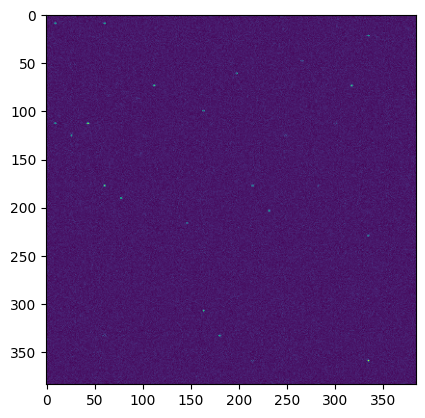

In [39]:
import matplotlib.pyplot as plt
plt.imshow(images_train[-100,0,:,:])
torch.min(images_train[-100,0,:,:])

In [40]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import gc
from torch.optim.lr_scheduler import StepLR
import torchvision as tv
import timm
device='cuda'

#model = timm.create_model('volo_d1_384', in_chans=40,drop_path_rate=.5, num_classes=500,pretrained=True)
# model = timm.create_model('volo_d1_224', in_chans=40,drop_path_rate=.4, num_classes=500,pretrained=True)
# #model=Pat()
#model.to(device)
torch.cuda.empty_cache()
gc.collect()

class TestDataset(Dataset):
    def __init__(self, images, x):
        self.images = images
        self.x = x

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image = self.images[index,:,:,:]
        x = self.x[index,:]

        return image.float(), x.float()
        
import random
class TrainDataset(Dataset):
    def __init__(self, images, x):
        self.images = images
        self.x = x

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        image = self.images[index,:,:,:]
        if random.random() < 0.5:
            image = image.flip(dims=[-1]) 
        if random.random() < 0.5:
            image = image.flip(dims=[-2])  # Assuming W=50 is the middle axis for flipping

        if random.random() < 0.5:
            image = image.flip(dims=[-3])  # Flipping the last dimension (H)
        

        x = self.x[index,:]

        return image.float(), x.float()


# Define your model architecture

import torch
from torch.utils.data import DataLoader, Sampler
import numpy as np



# Assuming you have your grayscale images and labels loaded in memory
from torch.optim.lr_scheduler import ExponentialLR, CosineAnnealingWarmRestarts


maxsy = torch.max(y_vels)
minsy = torch.min(y_vels)
print(maxsy,minsy)

y_vels2 = (y_vels-minsy)/(maxsy-minsy)

y_vels_test2 = (y_vels_test-minsy)/(maxsy-minsy)

dataset = TrainDataset(images_train, y_vels2)


# Create a dataloader
batch_size = 20
torch.cuda.empty_cache()
gc.collect()

dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True,drop_last=False,num_workers=0)#,sampler=sampler)
dataset_test = TestDataset(images_test, y_vels_test2)#  xtorch_test, distr_torch_test, scales_test2)
batch_size = 20
test_dataloader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False, drop_last=False, num_workers=0)

criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(),lr=0.00006,weight_decay=.001)
gamma = .998# The exponential decay factor (adjust as needed)
scheduler = CosineAnnealingWarmRestarts(optimizer, 2600, 2)

#scheduler = ExponentialLR(optimizer, gamma=gamma)
torch.cuda.empty_cache()
gc.collect()

# Training loop
num_epochs = 65
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for im,v in dataloader:
        optimizer.zero_grad()
        outputs = model(im.to(device))
        loss = criterion(outputs, v.to(device))
        loss.backward()
        optimizer.step()
        scheduler.step()
        running_loss += loss.item()

    # Print the average loss for the epoch
    epoch_loss = running_loss / len(dataloader)
    model.eval()
    running_loss2=0
    with torch.no_grad():
        for im_tst,speed_tst in test_dataloader:
            outputs_tst = model(im_tst.to(device))
            loss2 = criterion(outputs_tst, speed_tst.to(device))
            running_loss2 += loss2.item()
    epoch_loss2 = running_loss2 / len(test_dataloader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.5f},  Test Loss: {epoch_loss2:.5f},Learning Rate: {optimizer.param_groups[0]['lr']:.7f}")
    torch.cuda.empty_cache()
    gc.collect()
print("Training finished!")

tensor(69.2162) tensor(-66.9786)
Epoch [1/65], Loss: 0.00015,  Test Loss: 0.00006,Learning Rate: 0.0000600
Epoch [2/65], Loss: 0.00009,  Test Loss: 0.00008,Learning Rate: 0.0000599
Epoch [3/65], Loss: 0.00009,  Test Loss: 0.00006,Learning Rate: 0.0000598
Epoch [4/65], Loss: 0.00008,  Test Loss: 0.00006,Learning Rate: 0.0000596
Epoch [5/65], Loss: 0.00008,  Test Loss: 0.00006,Learning Rate: 0.0000593
Epoch [6/65], Loss: 0.00008,  Test Loss: 0.00006,Learning Rate: 0.0000590
Epoch [7/65], Loss: 0.00007,  Test Loss: 0.00007,Learning Rate: 0.0000587
Epoch [8/65], Loss: 0.00008,  Test Loss: 0.00007,Learning Rate: 0.0000583
Epoch [9/65], Loss: 0.00007,  Test Loss: 0.00006,Learning Rate: 0.0000579
Epoch [10/65], Loss: 0.00007,  Test Loss: 0.00012,Learning Rate: 0.0000574
Epoch [11/65], Loss: 0.00008,  Test Loss: 0.00008,Learning Rate: 0.0000568
Epoch [12/65], Loss: 0.00007,  Test Loss: 0.00005,Learning Rate: 0.0000562
Epoch [13/65], Loss: 0.00007,  Test Loss: 0.00007,Learning Rate: 0.0000556
E

In [ ]:
#first 500 simulations
#Higher and lower image size volo model
#no scaling

In [24]:
torch.cuda.empty_cache()
gc.collect()
images_train.shape

torch.Size([685, 40, 384, 384])

In [71]:
speed_tst.shape
out_vecs.shape

AttributeError: 'list' object has no attribute 'shape'

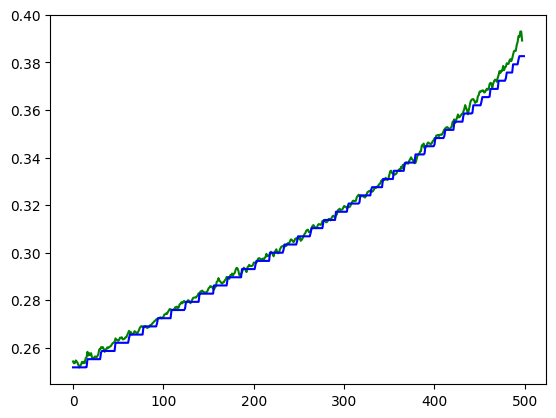

In [25]:
#k=8
model.eval()
ground_truth=[]
preds=[]
losses=[]
with torch.no_grad():
    for im_tst,speed_tst in test_dataloader:
    # Forward pass
        outputs_tst = model(im_tst.to(device))
        #loss2 = criterion(outputs_tst, speed_tst.to(device))
        out_vecs=[]
        for k in range(len(outputs_tst)):
            out = outputs_tst[k,:].cpu().detach().squeeze()
            #
            
            def rolling_mean(matrix, window):
                df = pd.DataFrame(matrix)
                return df.rolling(window=window).mean().dropna().to_numpy()
            out_mean = np.abs(rolling_mean(out,3))
            #out_mean=out_mean[out_mean>0]
            #out_mean[out_mean<0]=0.0001
            out_vecs.append(out_mean)
       # losses.append(loss2.item())
        preds.append(out_vecs)
        ground_truth.append(speed_tst.numpy())
    # for i in out:
#     if (i>.03)&(count<400):
#         out[:,count
#     count+=1
plt.plot(out_mean, c='g')
plt.plot(speed_tst[k], c='b')


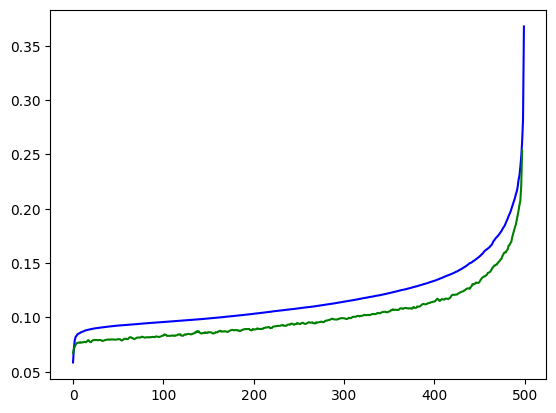

In [19]:
plt.plot(speed_tst[k], c='b')
plt.plot(out_mean, c='g')


In [20]:
pred.shape

NameError: name 'pred' is not defined

In [34]:
gt.shape

(500, 2)

In [101]:
ground_truth[i][j].shape

(500,)

C:\Users\marcb\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\marcb\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


nan

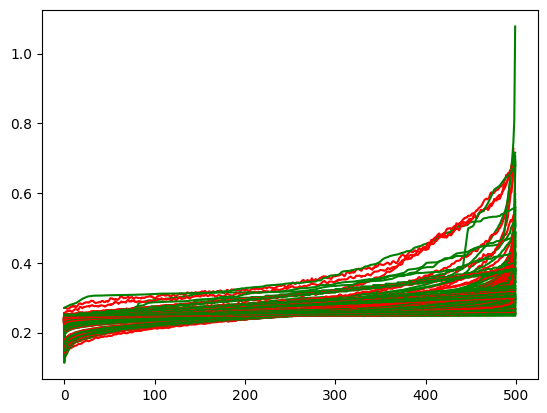

In [26]:
len(preds)
from scipy.stats import norm, expon
xgt=[]
ygt=[]

losses=[]
xpreds=[]
ypreds=[]

criterion = nn.MSELoss()
#ground_truth[-1].shape
for i in range(len(preds)):
    for j in range(len(preds[i])):
        pred = preds[i][j]#(.00*preds1[i][j]+0.3*preds2[i][j]+.7*preds3[i][j])
        gt = ground_truth[i][j]
        #pred = pred.reshape([498,])

        plt.plot(pred,c='r')

        plt.plot(gt,c='g')
        #plt.xlim([0,100])
        #plt.ylim([0,.8])
        #xpreds.append(pred[:,0])
        ypreds.append(pred)
        #xgt.append(gt[:,0])
        ygt.append(gt)

        #plt.title('Loss = '+str(loss.item()))
        #plt.show()
        
np.mean(losses)
#ground_truth[0].shape

In [44]:
np.vstack(xgt).shape

(172, 500)

In [27]:
flat_pred = np.hstack(ypreds)
flat_pred=np.nanmean(np.sort(flat_pred),1)
flat_pred.shape

(498,)

In [28]:
flat_gt = np.vstack(ygt)
flat_gt=np.nanmean(np.sort(flat_gt),0)
flat_gt.shape

(500,)

In [ ]:

tensor(69.2162) tensor(-66.9786)


In [41]:
torch.save(model.state_dict(), 'vy_model_volod1_384px_disp_all_max69_2162_min-66_9786_v3')

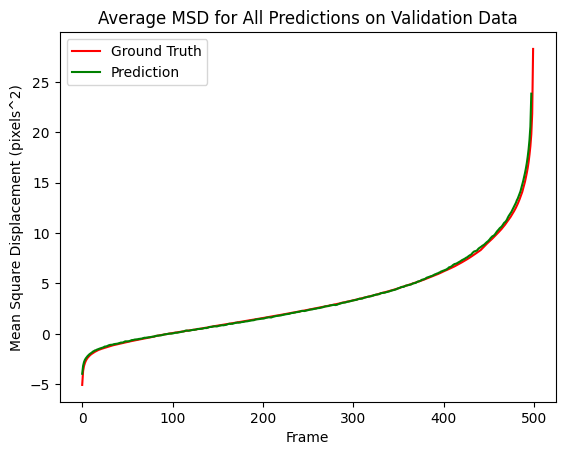

In [30]:
scale_factor=np.array(maxsy-minsy)
intercept = np.array(minsy)
# scales[i,:] = torch.tensor([a,b,c])
plt.plot(flat_gt*scale_factor+intercept,c='r')


# scales[i,:] = torch.tensor([a,b,c])
plt.plot(flat_pred*scale_factor+intercept,c='g')
plt.title('Average MSD for All Predictions on Validation Data')
plt.xlabel('Frame')
plt.ylabel('Mean Square Displacement (pixels^2)')
plt.legend(['Ground Truth', 'Prediction'])


In [54]:
print('Y Scale factor: ', scale_factor)

Y Scale factor:  130.59189


In [53]:
print('Y Intercept: ',intercept)

Y Intercept:  -66.140625


In [31]:
print('X Scale factor: ', scale_factor)
print('X Intercept: ',intercept)

X Scale factor:  201.03192
X Intercept:  -49.924103
